In [1]:
import pandas as pd
import numpy as np
from plotly import express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [2]:
spotipy = pd.read_csv('project6.csv', sep=',')

In [3]:
spotipy

,Unnamed: 0,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0,0.895,0.404,-10.241,0.1080,0.218000,0.316000,0.0974,0.1760,112.993,3q6ql0KuUMPBolEfd8LhbE,284602
1,1,0.705,0.549,-8.171,0.1840,0.477000,0.479000,0.0888,0.2740,84.014,6LRY3cFPXnM9WXKXrKPKJr,174286
2,2,0.806,0.545,-10.199,0.0569,0.000086,0.865000,0.1030,0.6720,124.998,72heTYSB1VaSn8LBR7JKS6,323200
3,3,0.765,0.776,-7.991,0.0326,0.033500,0.617000,0.1340,0.7080,104.015,5nLAheg0AIva7wue6gUiNN,234519
4,4,0.927,0.525,-8.256,0.0667,0.274000,0.238000,0.0672,0.7780,118.023,1vMGIZbIkpaLSagdF2ygcV,198305
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,395,0.528,0.826,-6.898,0.0366,0.216000,0.438000,0.0975,0.1820,123.012,7EMoSEOUoS90lQdXll2mak,299746
1315,396,0.901,0.654,-12.354,0.0405,0.286000,0.010100,0.0701,0.9040,138.977,4ZTSygIiwgD9jJE2dc4w78,388160
1316,397,0.619,0.868,-6.571,0.0363,0.009230,0.495000,0.3400,0.7450,118.836,0PvaYr8WfHQa15r7TfmgDN,236640
1317,398,0.196,0.313,-17.095,0.0437,0.953000,0.963000,0.0864,0.0747,143.676,4i6HWnWWkpoUyUi0SZ3lZ8,305500


In [4]:
spotipy.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
spotipy.drop_duplicates(inplace=True)

In [6]:
spotipy

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.895,0.404,-10.241,0.1080,0.218000,0.316000,0.0974,0.1760,112.993,3q6ql0KuUMPBolEfd8LhbE,284602
1,0.705,0.549,-8.171,0.1840,0.477000,0.479000,0.0888,0.2740,84.014,6LRY3cFPXnM9WXKXrKPKJr,174286
2,0.806,0.545,-10.199,0.0569,0.000086,0.865000,0.1030,0.6720,124.998,72heTYSB1VaSn8LBR7JKS6,323200
3,0.765,0.776,-7.991,0.0326,0.033500,0.617000,0.1340,0.7080,104.015,5nLAheg0AIva7wue6gUiNN,234519
4,0.927,0.525,-8.256,0.0667,0.274000,0.238000,0.0672,0.7780,118.023,1vMGIZbIkpaLSagdF2ygcV,198305
...,...,...,...,...,...,...,...,...,...,...,...
1313,0.580,0.859,-7.188,0.0772,0.055200,0.033800,0.3580,0.7340,164.807,32w5cY5h7jY5oovSLAIBqo,315848
1314,0.528,0.826,-6.898,0.0366,0.216000,0.438000,0.0975,0.1820,123.012,7EMoSEOUoS90lQdXll2mak,299746
1315,0.901,0.654,-12.354,0.0405,0.286000,0.010100,0.0701,0.9040,138.977,4ZTSygIiwgD9jJE2dc4w78,388160
1317,0.196,0.313,-17.095,0.0437,0.953000,0.963000,0.0864,0.0747,143.676,4i6HWnWWkpoUyUi0SZ3lZ8,305500


In [7]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(spotipy[['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']])

In [8]:
df_normalized = pd.DataFrame(X_normalized, columns=['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms'])



In [9]:
import pickle

with open("scaler.pickle", "wb") as f: #saves the model in dir and file name given
    pickle.dump(scaler,f)

In [10]:
pca = PCA(n_components=7)

In [11]:
pca.fit(X_normalized)

PCA(n_components=7)

In [12]:
pca.explained_variance_ratio_

array([0.25409713, 0.14132796, 0.12991417, 0.10102498, 0.0949208 ,
       0.08175178, 0.07437159])

In [13]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25409713, 0.39542509, 0.52533926, 0.62636424, 0.72128504,
       0.80303682, 0.87740841])

In [14]:
X_pca = pca.transform(X_normalized)

Training a K-Means model with 1 clusters! 

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

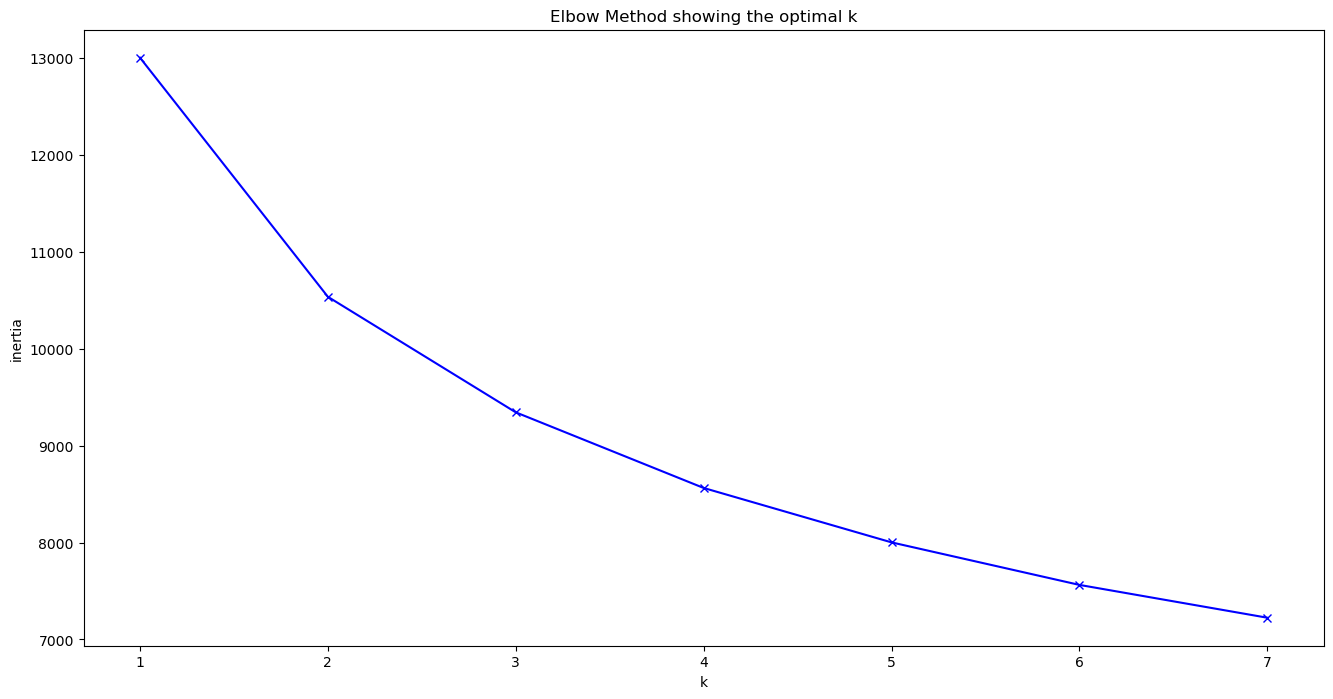

In [35]:
K = range(1, 8) #range of the clusters
inertia = []

for k in K: #for every data in set build a inertia
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0)) #changing the scale
plt.title('Elbow Method showing the optimal k') 

In [122]:
kmeans = KMeans(n_clusters=20, n_init=10)

In [123]:
kmeans.fit(X_pca)

KMeans(n_clusters=20)

In [124]:
cluster_ids = kmeans.predict(X_pca)

In [125]:
cluster_distances = kmeans.transform(X_pca)

In [134]:
cluster_ids = KMeans(n_clusters=15, n_init=10).fit_predict(X_normalized)

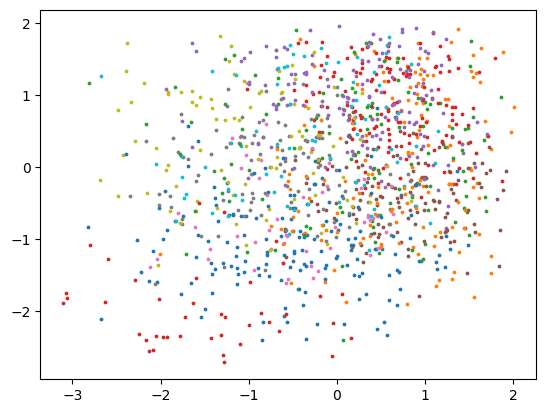

In [135]:
for c in np.unique(cluster_ids):
    plt.scatter(X_normalized[cluster_ids == c, 0], X_normalized[cluster_ids == c, 1], marker='.', s=12)

In [139]:
spotipy["cluster"] = cluster_ids

In [138]:
df_normalized["cluster"] = cluster_ids

In [146]:
df_normalized[df_normalized["cluster"] == 13]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
424,-1.317068,-2.331490,-3.849879,-0.507993,2.277343,1.739455,-0.566332,-0.458719,-1.189149,0.044489,13
428,-1.630364,-1.882453,-2.941750,-0.413101,0.334764,-0.844298,-0.356409,0.308767,2.156752,-1.537163,13
435,0.156582,-2.367375,-3.538007,-0.418162,1.542497,1.513238,-0.503355,-0.504539,-1.201707,-1.567642,13
437,-0.574441,-2.033549,-2.137407,-0.609211,2.222910,-0.119590,-0.363906,-1.741679,-1.090977,-0.415881,13
466,-1.293861,-2.615738,-4.085967,-0.559867,2.515487,1.933771,-0.258944,-1.050561,-0.954082,-1.476023,13
474,-2.796519,-1.084480,-0.984199,-0.533297,2.420230,1.394329,-0.228955,-1.608038,-1.573744,-0.388237,13
478,-0.052282,-2.619988,-3.038857,-0.449793,0.953940,1.666950,0.408314,-1.569854,-0.635648,-0.233757,13
506,-2.013280,-1.825792,-1.328954,-0.595293,1.695590,0.260340,-0.311425,-1.298752,-1.885544,-0.632786,13
507,-0.864530,-2.024105,-2.085257,-0.582641,2.049405,-0.458916,-0.393895,-1.466759,-0.648505,-1.181772,13
527,-3.109815,-1.882453,-3.947500,-0.421958,2.001776,1.922170,3.654638,-1.882576,-1.022829,-1.656427,13


In [147]:
spotipy[spotipy["cluster"] == 13]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
430,0.417,0.08890,-24.661,0.0360,0.926,0.897000,0.0830,0.4110,88.250,7wqF3BU0ykeKch6BcNqGiT,269533,13
434,0.363,0.18400,-21.126,0.0435,0.355,0.006120,0.1110,0.6120,177.510,1wPNVQqGT9LG39nzeyzIvF,120603,13
441,0.671,0.08130,-23.447,0.0431,0.710,0.819000,0.0914,0.3990,87.915,2QqouLGFYMynquwDMYUGk1,117733,13
443,0.545,0.15200,-17.995,0.0280,0.910,0.256000,0.1100,0.0750,90.869,0UC6CJgTFCikxLJZMNw8Xu,226184,13
473,0.421,0.02870,-25.580,0.0319,0.996,0.964000,0.1240,0.2560,94.521,0zBJiHTrEyed4AZ42jcrH5,126360,13
481,0.162,0.35300,-13.506,0.0340,0.968,0.778000,0.1280,0.1100,77.990,7ofTQzu9vlvqQ8XhDCG2r3,228787,13
485,0.635,0.02780,-21.504,0.0406,0.537,0.872000,0.2130,0.1200,103.016,4JWfPMjVEh4SusNs8V3gt5,243333,13
514,0.297,0.19600,-14.848,0.0291,0.755,0.387000,0.1170,0.1910,69.672,46SOx5T1UwQ1Ke8dA3RAhF,205760,13
515,0.495,0.15400,-17.792,0.0301,0.859,0.139000,0.1060,0.1470,102.673,2hdeaGl9nT3UoQIgSqctHj,154067,13
535,0.108,0.18400,-25.041,0.0428,0.845,0.960000,0.6460,0.0381,92.687,7247tbkbcuPiyh2j2MCdX1,109373,13


In [140]:
spotipy

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.895,0.404,-10.241,0.1080,0.218000,0.316000,0.0974,0.1760,112.993,3q6ql0KuUMPBolEfd8LhbE,284602,5
1,0.705,0.549,-8.171,0.1840,0.477000,0.479000,0.0888,0.2740,84.014,6LRY3cFPXnM9WXKXrKPKJr,174286,7
2,0.806,0.545,-10.199,0.0569,0.000086,0.865000,0.1030,0.6720,124.998,72heTYSB1VaSn8LBR7JKS6,323200,11
3,0.765,0.776,-7.991,0.0326,0.033500,0.617000,0.1340,0.7080,104.015,5nLAheg0AIva7wue6gUiNN,234519,14
4,0.927,0.525,-8.256,0.0667,0.274000,0.238000,0.0672,0.7780,118.023,1vMGIZbIkpaLSagdF2ygcV,198305,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1313,0.580,0.859,-7.188,0.0772,0.055200,0.033800,0.3580,0.7340,164.807,32w5cY5h7jY5oovSLAIBqo,315848,4
1314,0.528,0.826,-6.898,0.0366,0.216000,0.438000,0.0975,0.1820,123.012,7EMoSEOUoS90lQdXll2mak,299746,9
1315,0.901,0.654,-12.354,0.0405,0.286000,0.010100,0.0701,0.9040,138.977,4ZTSygIiwgD9jJE2dc4w78,388160,5
1317,0.196,0.313,-17.095,0.0437,0.953000,0.963000,0.0864,0.0747,143.676,4i6HWnWWkpoUyUi0SZ3lZ8,305500,13


In [141]:
df_normalized

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,1.456179,-0.843672,-0.145432,0.402968,-0.131319,0.054424,-0.458372,-1.356028,-0.261661,0.204524,5
1,0.353842,-0.159021,0.386344,1.364538,0.749816,0.527161,-0.522848,-0.981831,-1.347936,-0.967044,7
2,0.939821,-0.177908,-0.134642,-0.243561,-0.872677,1.646648,-0.416387,0.537867,0.188345,0.614439,11
3,0.701948,0.912812,0.432586,-0.551010,-0.758999,0.927392,-0.183971,0.675327,-0.598200,-0.327363,14
4,1.641835,-0.272342,0.364508,-0.119569,0.059197,-0.171794,-0.684789,0.942610,-0.073112,-0.711959,5
...,...,...,...,...,...,...,...,...,...,...,...
1228,-0.371379,1.304716,0.638873,0.013279,-0.685175,-0.764020,1.495420,0.774604,1.680581,0.536360,4
1229,-0.673071,1.148899,0.713373,-0.500401,-0.138123,0.408251,-0.457622,-1.333118,0.113900,0.365355,9
1230,1.490989,0.336761,-0.688254,-0.451058,0.100022,-0.832756,-0.663047,1.423721,0.712347,1.304321,5
1231,-2.599259,-1.273350,-1.906200,-0.410571,2.369199,1.930870,-0.540842,-1.742825,0.888488,0.426463,13


In [84]:
from IPython.display import IFrame

#track_id = "1rfORa9iYmocEsnnZGMVC4"
track_id= '0EFKOoOek7dGXQKuOxGQRE'
IFrame(src="https://open.spotify.com/embed/track/"+track_id+"?utm_source=generator",
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [ ]:
#k.means.predict : pour récupérer plus de chansons 
#récupérer les features

In [150]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [151]:
results = sp.search(q="Love yourself",limit=3,market="GB")

NameError: name 'sp' is not defined

In [ ]:
formater au df avec toutes les features

In [ ]:
.transform du scaler 

In [ ]:
on met le output dans le k.means 

In [ ]:
1. choisir un son
2. récupérer les features et les mettres dans nouveay dataframe 